In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline  
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./data/', one_hot = True)
training_img = mnist.train.images
training_lab = mnist.train.labels
test_img = mnist.test.images
test_lab = mnist.test.labels

/Users/kimsw27/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [2]:
# CNN Model (http://cs231n.github.io/convolutional-networks/)

x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, 10])
keep_ratio = tf.placeholder(tf.float32)


W_1 = tf.Variable(tf.random_normal([3, 3, 1, 64], stddev=0.01))
b_1 = tf.Variable(tf.random_normal([64], stddev=0.01))

conv_1 = tf.nn.conv2d(x, W_1, strides=[1, 1, 1, 1], padding='SAME') + b_1
conv_1 = tf.nn.relu(conv_1)
conv_1 = tf.nn.max_pool(conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W_2 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
b_2 = tf.Variable(tf.random_normal([128], stddev=0.01))

conv_2 = tf.nn.conv2d(conv_1, W_2, strides=[1, 1, 1, 1], padding='SAME') + b_2
conv_2 = tf.nn.relu(conv_2)
conv_2 = tf.nn.max_pool(conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W_3 = tf.Variable(tf.random_normal([7 * 7 * 128, 1024], stddev=0.01))
b_3 = tf.Variable(tf.random_normal([1024], stddev=0.01))

flatten = tf.reshape(conv_2, [-1, 7 * 7 * 128])

dense_1 = tf.matmul(flatten, W_3) + b_3
dense_1 = tf.nn.relu(dense_1)

W_4 = tf.Variable(tf.random_normal([1024, 128], stddev=0.01))
b_4 = tf.Variable(tf.random_normal([128], stddev=0.01))

dense_2 = tf.matmul(dense_1, W_4) + b_4
dense_2 = tf.nn.relu(dense_2)
dense_2 = tf.nn.dropout(dense_2, keep_ratio)


W_5 = tf.Variable(tf.random_normal([128, 10], stddev=0.01))
b_5 = tf.Variable(tf.random_normal([10], stddev=0.01))

output = tf.matmul(dense_2, W_5) + b_5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y))

optimization = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost) 

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))    
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [3]:
# Training

training_epochs = 10
display_step    = 1
batch_size = 100


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


for epoch in range(training_epochs):
    average_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
   
    for iteration in range(total_batch):
    
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        sess.run(optimization, feed_dict={x: batch_xs, y: batch_ys, keep_ratio:0.7})
        average_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_ratio: 1.0 })/total_batch
        
    if (epoch) % display_step == 0:

        print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, average_cost))
        
        #  training set accuracy
        training_acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_ratio: 1.0})
        print ("TRAINING ACCURACY: %.3f" % (training_acc))

        # test set accuracy
        feed_test = {x: test_img.reshape(-1, 28, 28, 1), y: test_lab, keep_ratio: 1.0}
        pred, test_corr, test_acc = sess.run([tf.argmax(output, 1), correct_prediction, accuracy], feed_dict=feed_test)
        print ("TEST ACCURACY: %.3f" % (test_acc))

print ("Optimization finished")

KeyboardInterrupt: 

In [60]:
def image_show(*args):
    

    images = {}
    pred_labels = {}
    target_labels = {}
    if len(args)<5:
        print("5 이상의 숫자를 입력해주세요.")
    else:
        fig, axes = plt.subplots(len(args)//5+1, 5,  figsize = (30, 6*len(args)//5+1))
        len(args)
   
        for k in range(5-(len(args)%5)):
            fig.delaxes(axes[len(args)//5][4-k])

        i = 0
        for i in args:
            images[i] = np.reshape(test_img[np.where(test_corr==False)[0][i]],(28,28))
            pred_labels[i] = pred[np.where(test_corr==False)[0][i]]
            target_labels[i] = test_lab[np.where(test_corr==False)[0][i]]
            axes[args.index(i)//5, args.index(i)%5].set_title("Target : {}".format(np.argmax(target_labels[i])) +
                                      "\nPrediction : {}".format(pred_labels[i] ),  fontsize=30)    
            axes[args.index(i)//5, args.index(i)%5].imshow(images[i], cmap=plt.get_cmap('gray'))
            fig.tight_layout()
            axes[args.index(i)//5, args.index(i)%5].set_aspect('equal')        
            i += 1  
        plt.show()
    
def false_img(num):
     random_num = np.random.choice(len(np.where(test_corr==False)[0]), size=num)
     image_show(*random_num)     

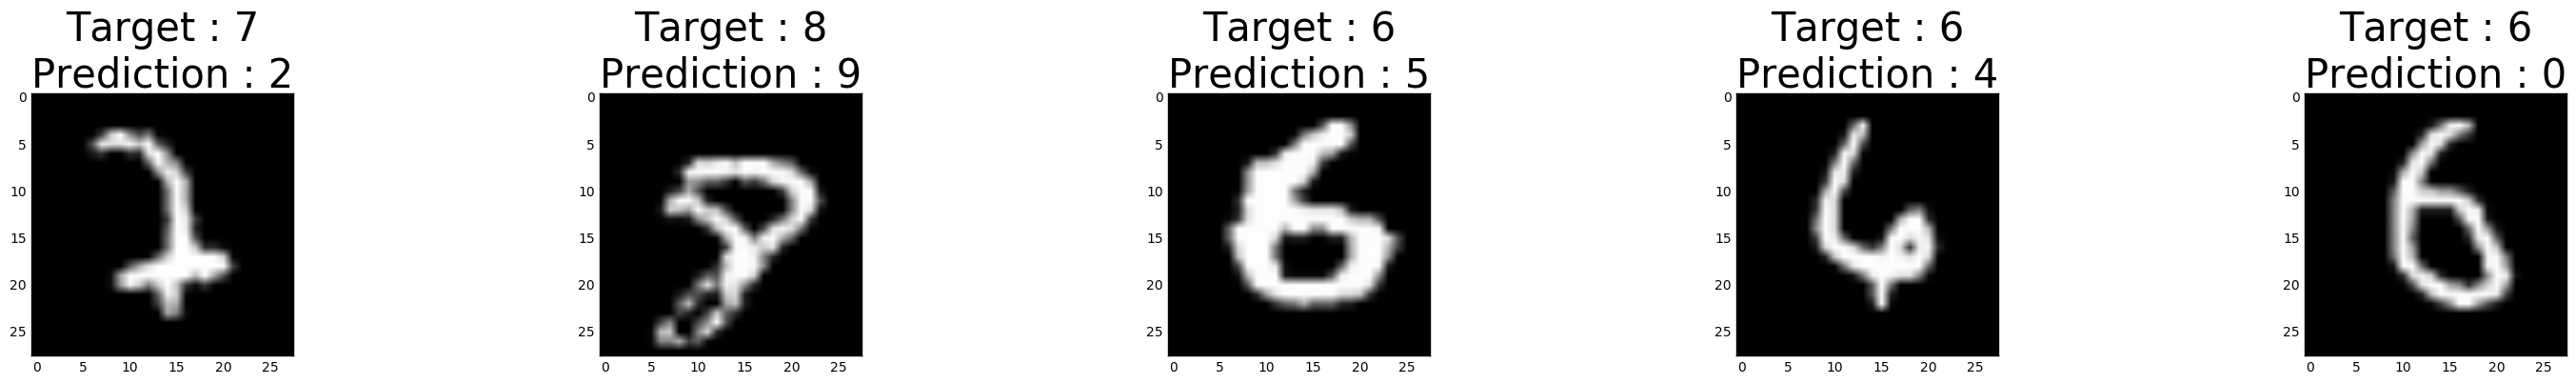

In [61]:
false_img(5)